In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#regression model:
# Data
np.random.seed(42)
x= 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

In [3]:
def cost_function(x,y,w,b):
    m =x.shape[0]
    cost = 0
    for i in range(m):
        cost += (w*x[i] + b - y[i])**2
    return cost/(2*m)

$$ J(w,b)= \frac{1}{2m} \sum_{i=1}^m({f_{w,b}x^{(i)} - y^{(i)}})^2 $$

In [4]:
def compute_gradient(x,y,w,b):
    dj_w = 0
    dj_b = 0
    m = x.shape[0]
    for i in range(m):
        dj_w += (w*x[i] + b - y[i])*x[i]
        dj_b += (w*x[i] + b -y[i])
    dj_w = dj_w/m
    dj_b = dj_b/m
    return (dj_w, dj_b)

In [72]:
def gradient_descent(x,y,w,b,a):
    dj_w, dj_b = compute_gradient(x,y,w,b)
    cost = 0
    count = 0
    run_it = True
    cost_history = []
    while(run_it):
        count += 1
        w = w - a*dj_w
        b = b - a*dj_b
        cost = cost_function(x,y,w,b)
        cost_history.append(cost)
        if(cost < 0.01 or count == 80000):
            run_it = False
    return (w,b, cost, cost_history, count)

In [73]:
w, b , cost, j_w, iterations = gradient_descent(x,y,0,0,0.000006)
w,b,cost

(array([3.54435964]), array([3.27360197]), array([0.53110977]))

In [74]:
def y_hat(x,w,b):
    m = x.shape[0]
    y_predict = np.zeros(m, dtype=int)
    for i in range(m):
        y_predict[i] = w*x[i] + b
    return y_predict

In [75]:
myy = w*x + b 

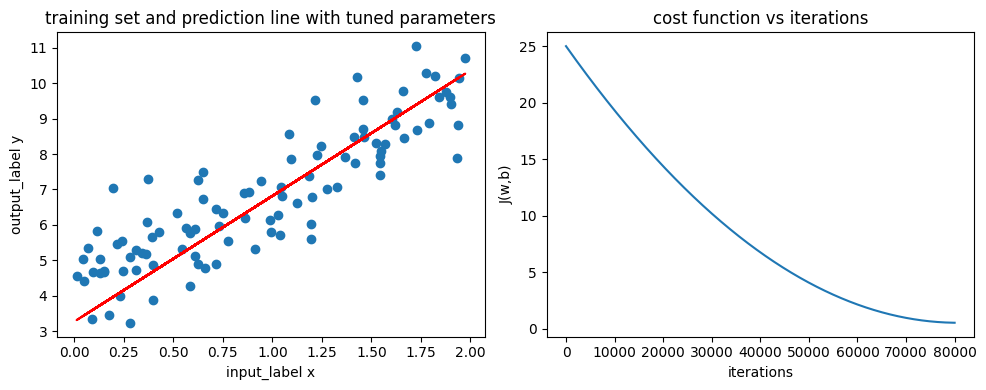

In [76]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (10,4))

axes[0].plot(x, myy, color = 'red')
axes[0].scatter(x,y)
axes[0].set_title('training set and prediction line with tuned parameters')
axes[0].set_xlabel('input_label x')
axes[0].set_ylabel('output_label y')

axes[1].plot(range(iterations), j_w)
axes[1].set_title("cost function vs iterations")
axes[1].set_xlabel('iterations')
axes[1].set_ylabel('J(w,b)')
plt.tight_layout()